In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

## carregando os dados contendo todas as noticias fakes

In [2]:
fake = pd.read_csv('fake.csv')
fake.shape

(23481, 4)

In [3]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


## Carregando os dados apenas contendo noticias reais.

In [5]:
true = pd.read_csv('true.csv')
true.shape

(21417, 4)

In [6]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
# atribuindo os labels 0 para noticia verdadeira e 1 para falsa
fake['target'] = 1
true['target'] = 0

In [9]:
# fazendo a junção dos dados em um único dataframe
df = pd.concat([true, fake], axis=0)

In [11]:
df

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [18]:
# aqui separamos nosso x que sera a nossa variável dependente, sendo ela a coluna 'text' e y nossa variável independente, os labels
# vamos dividir em treino(70%), validação(15%) e teste(15%).
X = df.text
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)

In [20]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=.5)

In [21]:
# visualizando como resultou as divisões das classes
y_train.value_counts(), y_val.value_counts(), y_test.value_counts()

(1    16450
 0    14978
 Name: target, dtype: int64,
 1    3500
 0    3235
 Name: target, dtype: int64,
 1    3531
 0    3204
 Name: target, dtype: int64)

In [59]:
# Agora vamos tokenizar nossos dados, isto é, transformar nossas palavras em inteiros
# atribuindo um index único para cada palavra.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X.text)
word_index = tokenizer.word_index
vocab_size = len(word_index)

In [60]:
# feito isso vamos passar a base de treino, validação e teste para sequencias de inteiros respectivamente
sequences = tokenizer.texts_to_sequences(X_train.text)
max_sequence_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

In [68]:
sequences_val = tokenizer.texts_to_sequences(X_val.text)
padded_sequences_val = pad_sequences(sequences_val, maxlen=max_sequence_length)

In [74]:
sequences_test = tokenizer.texts_to_sequences(X_test.text)
padded_sequences_test = pad_sequences(sequences_test, maxlen=max_sequence_length)

In [69]:
# Vamos montar a estrutura do nosso modelo, começão com um camada de Embedding,  passando as dimensões
# de entrada, saída e o tamanho máximo da entrada
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size + 1, 16, input_length=max_sequence_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [70]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 8375, 16)          2208352   
                                                                 
 global_average_pooling1d_3  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_6 (Dense)             (None, 24)                408       
                                                                 
 dropout_3 (Dropout)         (None, 24)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2208785 (8.43 MB)
Trainable params: 2208785 (8.43 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [72]:
model.fit(padded_sequences, y_train, validation_data=(padded_sequences_val, y_val), epochs=10, batch_size=64)

Epoch 1/10
492/492 [==============================] - 48s 94ms/step - loss: 0.6764 - accuracy: 0.5557 - val_loss: 0.6085 - val_accuracy: 0.8986
Epoch 2/10
492/492 [==============================] - 53s 107ms/step - loss: 0.4376 - accuracy: 0.8801 - val_loss: 0.2886 - val_accuracy: 0.9620
Epoch 3/10
492/492 [==============================] - 46s 94ms/step - loss: 0.2329 - accuracy: 0.9340 - val_loss: 0.1727 - val_accuracy: 0.9550
Epoch 4/10
492/492 [==============================] - 49s 100ms/step - loss: 0.1580 - accuracy: 0.9566 - val_loss: 0.1274 - val_accuracy: 0.9792
Epoch 5/10
492/492 [==============================] - 57s 117ms/step - loss: 0.1181 - accuracy: 0.9686 - val_loss: 0.1028 - val_accuracy: 0.9825
Epoch 6/10
492/492 [==============================] - 51s 103ms/step - loss: 0.0918 - accuracy: 0.9775 - val_loss: 0.0866 - val_accuracy: 0.9829
Epoch 7/10
492/492 [==============================] - 49s 101ms/step - loss: 0.0750 - accuracy: 0.9828 - val_loss: 0.0729 - val_accu

In [75]:
y_pred = model.predict(padded_sequences_test)

211/211 [==============================] - 2s 10ms/step


In [76]:
y_pred = [(i > .5).astype(int).item() for i in y_pred]
y_pred

[0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,


In [78]:
import seaborn as sbn

<Axes: >

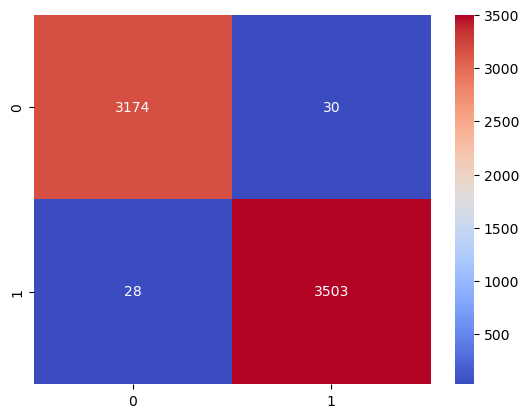

In [79]:
cm = confusion_matrix(y_test, y_pred)
sbn.heatmap(cm, cmap='coolwarm', annot=True, fmt='d')

In [80]:
accuracy_score(y_test, y_pred)

0.9913882702301411